In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import math
from glob import glob

In [11]:
n_issues = 10
voting = "borda"
step = 6

df1 = pd.read_csv(f"data/experiment_3_method_UM10_profile_100_step_{step}_{voting}.csv")
df1 = df1[df1["n_alternatives"] == n_issues]

df2 = pd.read_csv(f"data/experiment_3_method_UM50_profile_100_step_{step}_{voting}.csv")
df2 = df2[df2["n_alternatives"] == n_issues]

df3 = pd.read_csv(f"data/experiment_3_method_IC_profile_100_step_{step}_{voting}.csv")
df3 = df3[df3["n_alternatives"] == n_issues]


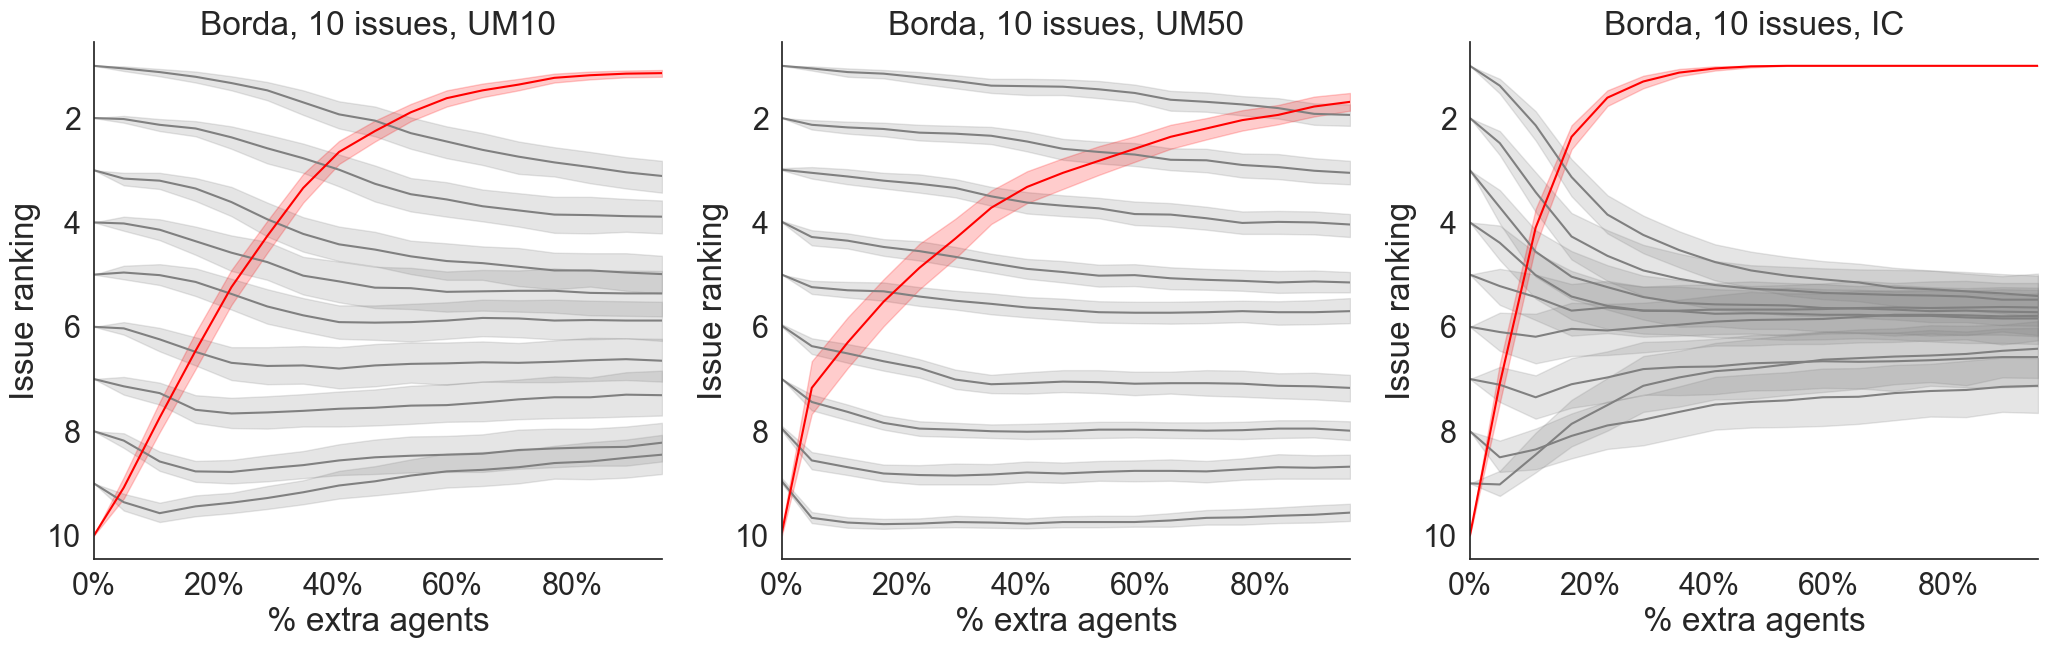

In [12]:
sns.set(font_scale=2, style="white")

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(21, 7))
for i, item in enumerate([(df1, "UM10"), (df2, "UM50"), (df3, "IC")]):
    df, _type = item
    df["percentage"] = (df["size"] - 100) / 100

    df = df[df["starting_id"] == n_issues]

    n_alternatives = df["n_alternatives"].unique()[0]
    ax = axs[i]
    palette = {c:"red" if c==n_issues else "grey" for c in df.custom_id.unique()}
    g = sns.lineplot(
        x="percentage",
        y="rank",
        palette=palette,
        hue="custom_id",
        data=df,
        legend=False,
        ax=ax
    )

    ax.set_xlabel("% extra agents")
    ax.set_ylabel("Issue ranking")
    ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))

    ax.set_title(f"{voting.title()}, {n_alternatives} issues, {_type}")
    ax.invert_yaxis()
    ax.margins(x=0)

fig.tight_layout()

sns.despine()